<a href="https://colab.research.google.com/github/yuna1411/Skripsi/blob/main/SkinCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplikasi Rekomendasi Produk Skincare Berdasarkan Permasalahan Kulit Wajah**

Proyek ini berupa sistem rekomendasi produk *skincare* berdasarkan permasalahan wajah yang dialami. 
Dataset bersumber dari hasil *web scrapping* dari beberapa website yang menjual produk skincare dengan rincian sebagai berikut :

1. produk-href : Link URL produk 
2. product_name : Nama produk 
3. price : Informasi harga produk 
4. description : Deskripsi mengenai produk
5. notable_effects : Kegunaan produk 
6. skintype : Jenis kulit yang cocok untuk produk 
7. picture_src : Link URL gambar produk
8. tipe_produk : Jenis produk 

# Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Load

In [ ]:
# Import the Dataset 

from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Dataset/Dataset Skripsi-FIX (2).csv"

'/content/drive/MyDrive/Dataset/Dataset Skripsi-FIX (2).csv'


In [ ]:
skincare = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset Skripsi-FIX (2).csv', low_memory=False)
skincare.info()
skincare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   produk-href      1246 non-null   object
 1   product_name     1246 non-null   object
 2   price            1245 non-null   object
 3   description      1246 non-null   object
 4   notable_effects  1246 non-null   object
 5   skintype         1243 non-null   object
 6   picture_src      1246 non-null   object
 7   tipe_produk      1246 non-null   object
dtypes: object(8)
memory usage: 78.0+ KB


,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash


# Data Exploration

In [ ]:
# Let's look at the unique classes in data
skincare['notable_effects'].unique()

array(['Acne-Free, Oil-Control, Pore-Care',
       'Pore-Care, Brightening, Anti-Aging', 'Acne-Free',
       'Acne-Free, Pore-Care, Brightening, Anti-Aging', 'Anti-Aging',
       'Soothing, Brightening', 'Cleansing', 'Soothing, Moisturizing',
       'Hydrating, Soothing', 'Moisturizing',
       'Brightening, Anti-Aging, UV-Protection',
       'Hydrating, Moisturizing', 'Acne-Free, Brightening, Anti-Aging',
       'Anti-Aging\n', 'UV-Protection', 'Brightening, Anti-Aging',
       'Soothing, Balancing', 'Anti-Aging, UV-Protection',
       'Moisturizing, Brightening, Black-Spot',
       'Brightening, UV-Protection', 'Moisturizing, UV-Protection',
       'UV-Protection, No-Whitecast', 'Pore-Care, Brightening',
       'No-Whitecast '], dtype=object)

In [ ]:
# Looking at number of classes 
skincare['notable_effects'].nunique()

24

In [ ]:
# Creating categorical features
categorical_features = ['notable_effects', 'skintype', 'tipe_produk']

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

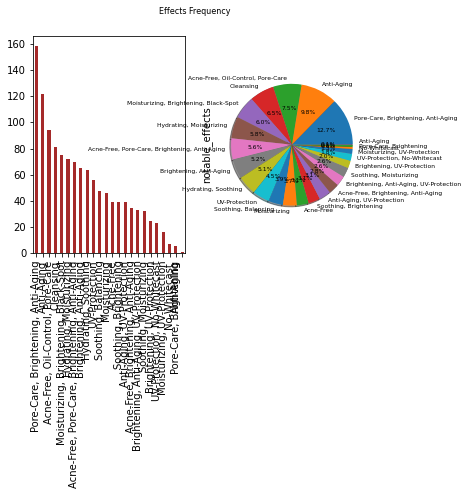

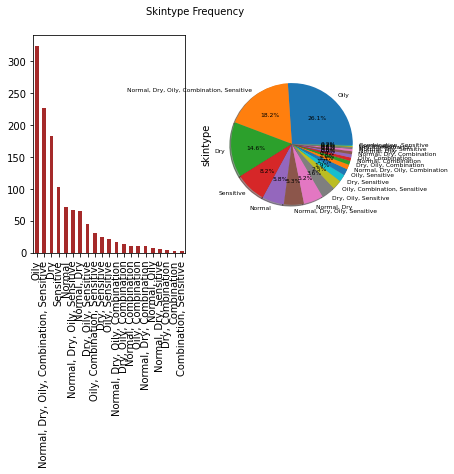

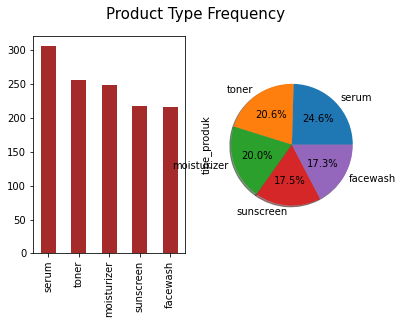

In [ ]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
skincare["notable_effects"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["notable_effects"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 6},ax=ax[1])
fig.suptitle("Effects Frequency", fontsize=8)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
skincare["skintype"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["skintype"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 6},ax=ax[1])
fig.suptitle("Skintype Frequency", fontsize=10)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
skincare["tipe_produk"].value_counts().plot.bar(color="brown", ax=ax[0])
skincare["tipe_produk"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Product Type Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

In [ ]:
# Creating numerical labels of notable_effects due to many effects shown by the diagram above
skincare['notable_effects']=skincare['notable_effects'].astype('category')
skincare['labels']=skincare['notable_effects'].cat.codes
skincare.head()

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,labels
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,2
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,3
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


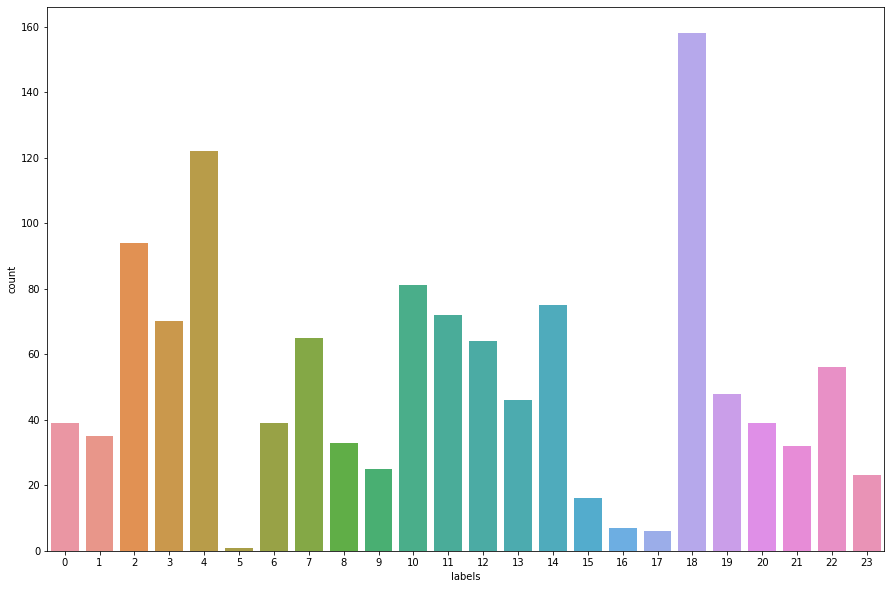

In [ ]:
# Looking at the label distribution
plt.figure(figsize=(15,10))
sns.countplot(skincare['labels'])

In [ ]:
# Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = skincare["tipe_produk"].value_counts()
auto_balancing["Count%"] = skincare["tipe_produk"].value_counts()/skincare.shape[0]*100

auto_balancing

,Count,Count%
serum,306,24.558587
toner,257,20.626003
moisturizer,249,19.983949
sunscreen,218,17.495987
facewash,216,17.335474


In [ ]:
# Let's look at the unique classes in categorical features
categorical_features = pd.DataFrame()
categorical_features["Count"] = skincare["skintype"].value_counts()
categorical_features["Count%"] = skincare["skintype"].value_counts()/skincare.shape[0]*100

categorical_features

,Count,Count%
Oily,324,26.003210
"Normal, Dry, Oily, Combination, Sensitive",226,18.138042
Dry,182,14.606742
Sensitive,102,8.186196
Normal,72,5.778491
"Normal, Dry, Oily, Sensitive",66,5.296950
"Normal, Dry",65,5.216693
"Dry, Oily, Sensitive",45,3.611557
"Oily, Combination, Sensitive",31,2.487961
"Dry, Sensitive",24,1.926164


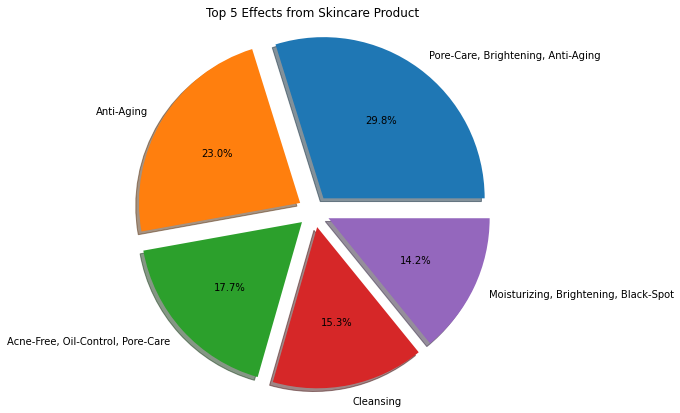

In [ ]:
# Plotting top notable_effects from skincare product 

top_effects=(skincare['notable_effects'].value_counts()).to_dict()
count= pd.DataFrame(list(top_effects.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(5)
labels = 'Pore-Care, Brightening, Anti-Aging','Anti-Aging','Acne-Free, Oil-Control, Pore-Care','Cleansing','Moisturizing, Brightening, Black-Spot'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 5 Effects from Skincare Product")
ax1.axis ('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


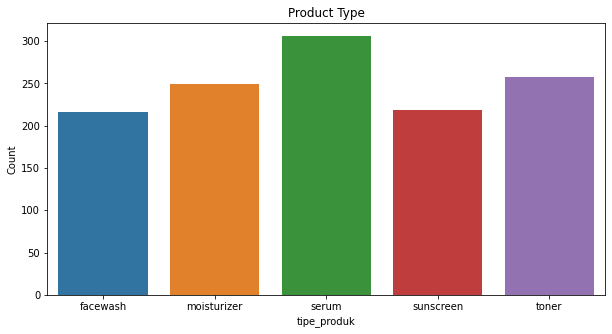

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(skincare['tipe_produk'].sort_values())
plt.xlabel('tipe_produk')
plt.ylabel('Count')
plt.title('Product Type')

plt.show()

In [ ]:
# Checking null value 

skincare.isnull().sum()

produk-href        0
product_name       0
price              1
description        0
notable_effects    0
skintype           3
picture_src        0
tipe_produk        0
labels             0
dtype: int64

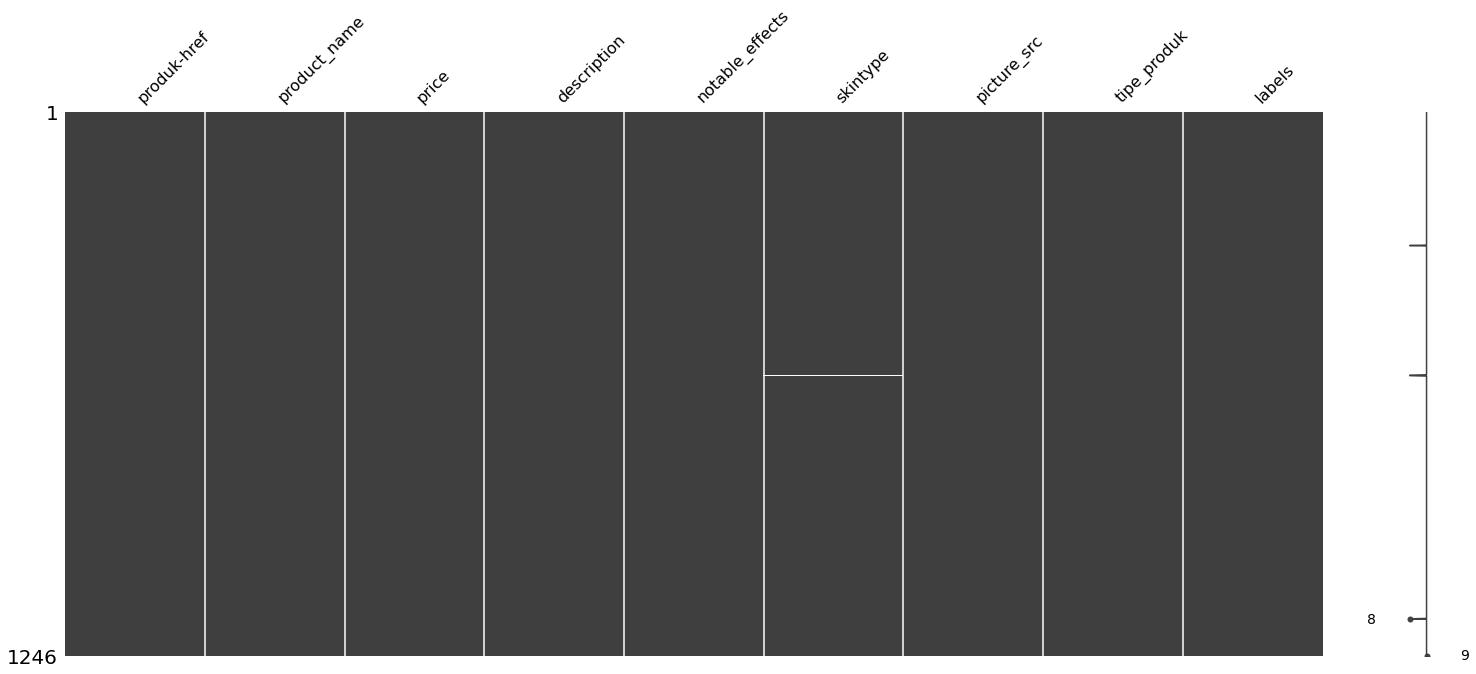

In [ ]:
# Visualize the missing values in the dataframe

mno.matrix(skincare)

In [ ]:
# Checking the existence of duplicated rows

skincare.duplicated().sum()

18

# Data Cleaning

In [ ]:
# Remove duplicated rows (18 in total)

skincare.drop_duplicates(inplace=True)

# Replacing the missing values

skincare["skintype"].fillna("Normal, Dry, Oily", inplace=True)

In [ ]:
# Re-checking null value 

skincare.isnull().sum()

# Re-checking the existence of duplicated rows

skincare.duplicated().sum()

0

In [ ]:
# Checking the data

skincare.head()

,produk-href,product_name,price,description,notable_effects,skintype,picture_src,tipe_produk,labels
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,2
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,Dry,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,3
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging","Dry, Oily, Sensitive",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18


# Data Preparation

**Encoding Each Skintypes**

In [ ]:
# Treat null values
skincare['skintype'].fillna('NA', inplace = True)

# Separate all skintype into one list, considering comma + space as separators
skintype = skincare['skintype'].str.split(', ').tolist()

# Flatten the list
flat_skintype = [item for sublist in skintype for item in sublist]

# Convert to a set to make unique
set_skintype = set(flat_skintype)

# Back to list
unique_skintype = list(set_skintype)

# Create columns by each unique skintype
skincare = skincare.reindex(skincare.columns.tolist() + unique_skintype, axis=1, fill_value=0)

# For each value inside column, update the dummy
for index, row in skincare.iterrows():
    for val in row.skintype.split(', '):
        if val != 'NA':
            skincare.loc[index, val] = 1

skincare.drop('skintype', axis = 1, inplace = True)    
skincare

,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Combination,Oily,Dry,Normal,Sensitive
0,https://www.beautyhaul.com/product/detail/acne...,Acne Gentle Cleansing Foam,Rp 35.000,Pembersih wajah bebas minyak untuk kulit BERJE...,"Acne-Free, Oil-Control, Pore-Care",https://www.beautyhaul.com/assets/uploads/prod...,facewash,2,0,0,1,0,0
1,https://www.beautyhaul.com/product/detail/aloe...,Natur Aloe Mild Cleanser,Rp 79.000,Natur Aloe Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18,0,1,1,0,1
2,https://www.beautyhaul.com/product/detail/acne...,Acne Care Lab Cleanser Scrub,Rp 104.500,Acne Care Lab Acne Cleanser Scrub Beta Plus (A...,Acne-Free,https://www.beautyhaul.com/assets/uploads/prod...,facewash,0,0,0,1,0,0
3,https://www.beautyhaul.com/product/detail/brig...,Brightening Facial Cleanser,Rp 35.000,"Pembersih wajah yang segar, lembut dan creamy ...","Acne-Free, Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,3,0,1,1,0,1
4,https://www.beautyhaul.com/product/detail/pome...,Natur Pome Mild Cleanser,Rp 79.000,Natur Pome Mild Cleanser dengan brush yang lem...,"Pore-Care, Brightening, Anti-Aging",https://www.beautyhaul.com/assets/uploads/prod...,facewash,18,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,https://ms-thefaceshop.eraspace.com/product/gr...,The Face Shop Green Natural Seed Anti Oxid Toner,Rp. 224.250,Green Natural Seed Anti-Oxidant Toner Booster ...,"Hydrating, Moisturizing",https://cdn.eraspace.com/pub/media/catalog/pro...,toner,11,0,0,1,1,0
1242,https://ms-thefaceshop.eraspace.com/product/ye...,The Face Shop Yehwadam Hwansaenggo Ultimate Re...,Rp. 679.150,Yehwadam Hwansaenggo Ultimate Rejuvenating Ton...,Anti-Aging,https://cdn.eraspace.com/pub/media/catalog/pro...,toner,4,1,1,1,1,1
1243,https://ms-thefaceshop.eraspace.com/product/ye...,The Face Shop Yehwadam Hgg Rejuvenating Serum 19R,Rp. 989.100,Yehwadam Heaven Grade Ginseng Rejuvenating Ser...,Anti-Aging,https://cdn.eraspace.com/pub/media/catalog/pro...,serum,4,1,1,1,1,1
1244,https://ms-thefaceshop.eraspace.com/product/wh...,The Face Shop White Seed Brightening Toner,Rp. 269.100,White Seed Brightening Toner Toner yang mengan...,"Soothing, Brightening",https://cdn.eraspace.com/pub/media/catalog/pro...,toner,20,1,1,1,1,1


## Exporting the DataFrame as a CSV file

The next stage is to extract the cleaned and prepared dataset into .csv format, to enter the modeling and deployment stage in the home.py file

In [ ]:
skincare.to_csv("skincare.csv")

# Modelling

### TF-IDF Vectorizer

The TF-IDF Vectorizer will be used in the recommendation system to find a representation of the important features of each notable_effects category. We will use the tfidfvectorizer() function from the sklearn library.

In [ ]:
# MODELLING with Content Based Filtering
# Initializing TfidfVectorizer
tf = TfidfVectorizer()
 
# Perform IDF calculation on 'notable_efects' data
tf.fit(skincare['notable_effects']) 
 
# Mapping array from integer index feature to name feature
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['acne',
 'aging',
 'anti',
 'balancing',
 'black',
 'brightening',
 'care',
 'cleansing',
 'control',
 'free',
 'hydrating',
 'moisturizing',
 'no',
 'oil',
 'pore',
 'protection',
 'soothing',
 'spot',
 'uv',
 'whitecast']

In [ ]:
# Doing fit then transformed to matrix form
tfidf_matrix = tf.fit_transform(skincare['notable_effects']) 
 
# Viewing matrix size TF IDF
shape = tfidf_matrix.shape
shape

(1228, 20)

In [ ]:
# Convert TF-IDF vector in matrix form with todense() function
tfidf_matrix.todense()

matrix([[0.37322634, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.40175709, 0.40175709, ..., 0.        , 0.        ,
         0.        ],
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.70710678, 0.70710678, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Making dataframe to see TF-IDF matrix
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=skincare.product_name
).sample(shape[1], axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,control,aging,protection,acne,moisturizing,hydrating,free,spot,cleansing,brightening,whitecast,oil,uv,care,no,pore,black,balancing,soothing,anti
product_name,,,,,,,,,,,,,,,,,,,,
QUESELLA Glowing Origin Serum 15ml,0.0,0.401757,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.409797,0.000000,0.0,0.000000,0.504603,0.000000,0.504603,0.0000,0.000000,0.000000,0.401757
QUESELLA Brightening Face Toner 100ml Rp 95.000 Rp 80.750 (12),0.0,0.401757,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.409797,0.000000,0.0,0.000000,0.504603,0.000000,0.504603,0.0000,0.000000,0.000000,0.401757
Innisfree Jeju Cherry Blossom Tone-up Cream SPF30/PA++ 50 mL,0.0,0.000000,0.640027,0.0,0.000000,0.0,0.0,0.0000,0.0,0.425126,0.000000,0.0,0.640027,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
Banana Boat Simply Protect Aqua Long Wearing Moisture Sunscreen Lotion SPF50+,0.0,0.000000,0.362628,0.0,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.607043,0.0,0.362628,0.000000,0.607043,0.000000,0.0000,0.000000,0.000000,0.000000
NACIFIC Pink AHA BHA Serum 50ml Rp 390.000,0.0,0.401757,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.409797,0.000000,0.0,0.000000,0.504603,0.000000,0.504603,0.0000,0.000000,0.000000,0.401757
Innisfree Bija Cica Mist 80mL,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.826797,0.562501,0.000000
Dear Klairs Freshly Juiced Vitamin E Mask Miniature 15ml,0.0,0.000000,0.000000,0.0,0.418647,0.0,0.0,0.6057,0.0,0.301643,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.6057,0.000000,0.000000,0.000000
Avoskin Natural Sublime Facial Cleanser,0.0,0.359055,0.551374,0.0,0.000000,0.0,0.0,0.0000,0.0,0.366240,0.000000,0.0,0.551374,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.359055
Bio Renew Foamy Cleanser 100g,0.0,0.401757,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.409797,0.000000,0.0,0.000000,0.504603,0.000000,0.504603,0.0000,0.000000,0.000000,0.401757


### Cosine Similarity

In [ ]:
# Calculating Cosine Similarity on the TF-IDF matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.33046392, 0.52782175, ..., 0.        , 0.        ,
        0.        ],
       [0.33046392, 1.        , 0.        , ..., 0.56817033, 0.22352495,
        0.        ],
       [0.52782175, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.56817033, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.22352495, 0.        , ..., 0.        , 1.        ,
        0.62198683],
       [0.        , 0.        , 0.        , ..., 0.        , 0.62198683,
        1.        ]])

In [ ]:
# Creating a dataframe from the cosine_similarity variable with rows and columns in the form of product names
cosine_sim_df = pd.DataFrame(cosine_sim, index=skincare['product_name'], columns=skincare['product_name'])
 
# See the similarity matrix for each product
cosine_sim_df.sample(7, axis=1).sample(10, axis=0)

product_name,CRE Marrakech Face Sunscreen SPF 30,Loreal Paris L'Oreal Paris UV Defender UV Serum Protector Moist & Fresh SPF50+ / PA++++,PYUNKANG YUL Moisture Serum (100ml),JOYLAB Skin'o'tic Moisture Gel 45ml,A'pieu Deep Clean Foam Cleanser,Wardah Renew You Anti Aging Day Cream,Innisfree Jeju Cherry Blossom Jelly Cream 50 mL
product_name,,,,,,,
KIEHLS Calendula Herbal Extract Alcohol Free Toner (250ml) Rp 595.000 Rp 565.250 (11),1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.569867
LaneigePerfect Renew Youth Regenerator,0.000000,0.000000,0.000000,1.000000,0.0,0.545695,0.000000
Somethinc Holygrail Multipeptide Youth Elixir,0.000000,0.000000,0.000000,0.811051,0.0,0.442586,0.000000
Laneige LNG White Dew Tone Up Fluid,0.000000,0.000000,0.000000,0.000000,0.0,0.758488,0.000000
JARKEEN Porecelain Skin Serum,0.000000,0.418647,0.418647,0.000000,0.0,0.000000,0.266317
SAFI Age Defy Concentrated Serum,0.000000,0.000000,0.000000,1.000000,0.0,0.545695,0.000000
Avoskin Avoskin Intensive Divine Day Cream,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.636137
KIEHLS Vital Skin-Strengthening Super Serum,0.000000,0.000000,0.000000,1.000000,0.0,0.545695,0.000000
HAPLE Silvermoon Serum,0.000000,0.000000,0.000000,0.568170,0.0,0.310048,0.000000


### Getting Recommendation

In [ ]:
def skincare_recommendations(nama, similarity_data=cosine_sim_df, items=skincare[['product_name', 'notable_effects']], k=5):
    
    # Retrieve data by using argpartition to partition indirectly along a given axis    
    # Dataframe converted to be numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Retrieve data with the greatest similarity from the existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop a name so that the name of the product we are looking for doesnt' appear in the list of recommendations
    closest = closest.drop(nama, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
skincare[skincare.product_name.eq('Wardah Renew You Anti Aging Day Cream')].head()

,produk-href,product_name,price,description,notable_effects,picture_src,tipe_produk,labels,Combination,Oily,Dry,Normal,Sensitive
1140,https://www.wardahbeauty.com/en/product/skinca...,Wardah Renew You Anti Aging Day Cream,"Rp104,000",Moisturizing cream with SPF 30 PA+++ to protec...,"Brightening, Anti-Aging",https://wardah-mainsite.s3-ap-southeast-1.amaz...,moisturizer,7,1,0,1,1,0


Trying to test the model by getting recommendation

In [ ]:
 # Getting skin care product recommendation which similar to Wardah Renew You Anti Aging Day Cream
skincare_recommendations("Wardah Renew You Anti Aging Day Cream")

,product_name,notable_effects
0,FOR SKINS SAKE Vitamin C Serum,"Brightening, Anti-Aging"
1,NEOGEN Bio Peel Gauze Pad Greentea Isi 30pads,"Brightening, Anti-Aging"
2,SKEYNDOR Eternal Intensive Serum,"Brightening, Anti-Aging"
3,KIEHLS Calendula Petal-Infused Calming Mask (1...,"Brightening, Anti-Aging"
4,KIEHLS Hydro Plumping Re-Texturizing Serum Con...,"Brightening, Anti-Aging"
